<a href="https://colab.research.google.com/github/prathvin123/gold_price_prediction/blob/main/gold_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [13]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [14]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
gold_data.shape

(2290, 6)

In [17]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
correlation = gold_data.corr()

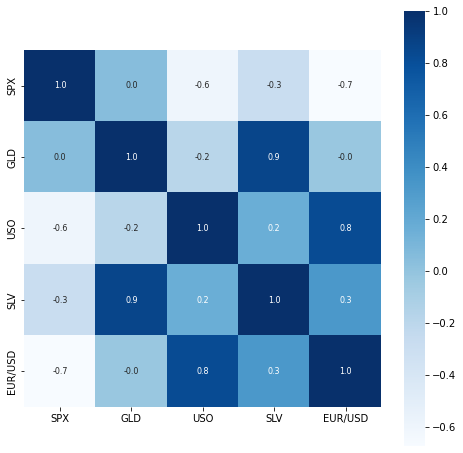

In [21]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [22]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


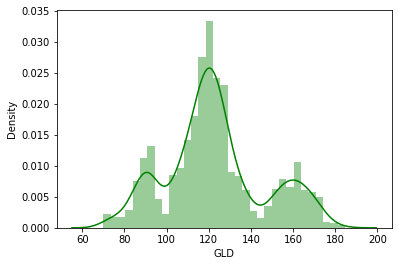

In [23]:
sns.distplot(gold_data['GLD'],color='green')

In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [29]:
regressor=RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
test_data_prediction=regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.41709962  82.20059981 116.00690002 127.57600064 120.61550167
 154.8012979  150.12429885 126.07840034 117.5358988  126.05340088
 116.98220081 172.37550047 141.66679833 167.84309858 115.13230023
 117.12850035 138.52280366 169.99330129 159.79850292 157.31149906
 155.18909998 125.3718     175.79999963 157.3344034  125.23710023
  93.82319934  77.57190002 120.62779984 119.15329931 167.4934999
  88.12730107 125.17370047  91.03470092 117.77790014 121.1214993
 136.34350025 115.3700013  115.94580077 147.04220015 107.03010065
 104.55280257  87.19619756 126.4118009  117.75190012 153.36709914
 119.61180014 108.29750036 108.01219824  93.28150077 127.33899694
  75.2747001  113.66579929 121.40860024 111.06859923 118.91249895
 120.82979932 160.36400031 167.0041017  146.81749629  85.75749844
  94.27850042  86.77909932  90.59650031 118.95960086 126.41740051
 127.79670052 168.83590011 122.1985993  117.55469863  98.39470005
 168.56010135 143.34379858 132.43410226 121.20960204 121.34469933
 119.5288006

In [37]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R square error:",error_score)

R square error: 0.9892866836307198


In [38]:
Y_test=list(Y_test)

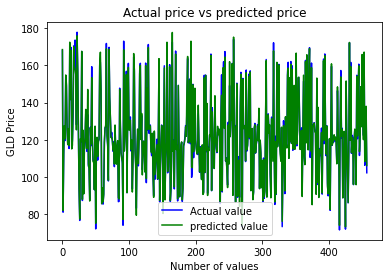

In [46]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
